# Libraries 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler, RobustScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [206]:
from imblearn.over_sampling import SMOTE
from haversine import haversine
import datetime as dt

# Loading Data

In [207]:
df = pd.read_csv('fraudTrain.csv', index_col=0)


In [208]:
df.dropna()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Analysis (on Training Set)

In [209]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

we can see that frauds are such a tiny minority of entries so we'll need to use SMOTE when training the model so it better understands fraudulent entries 

## Comparing Different Features Vs. Fraud 

In [210]:
features_to_compare = ['amt', 'gender', 'category', 'merchant', 'age', 'day', 'month', 'hour']

### Amount vs Fraud 

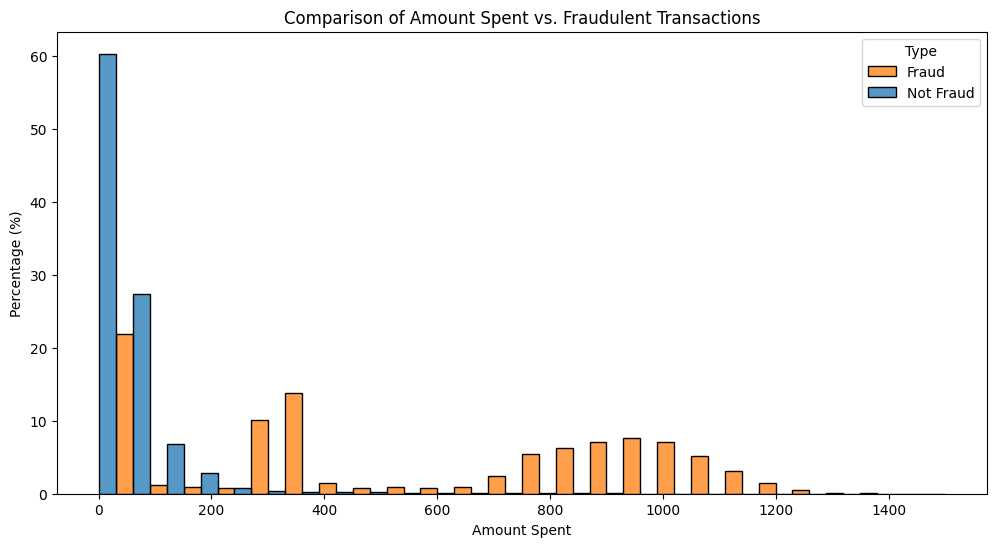

In [232]:
plt.figure(figsize=(12, 6))
sns.histplot(x='amt',data=df[df.amt<=1500],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)

plt.title('Comparison of Amount Spent vs. Fraudulent Transactions')
plt.xlabel('Amount Spent')
plt.ylabel('Percentage (%)')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.show()

analysis 

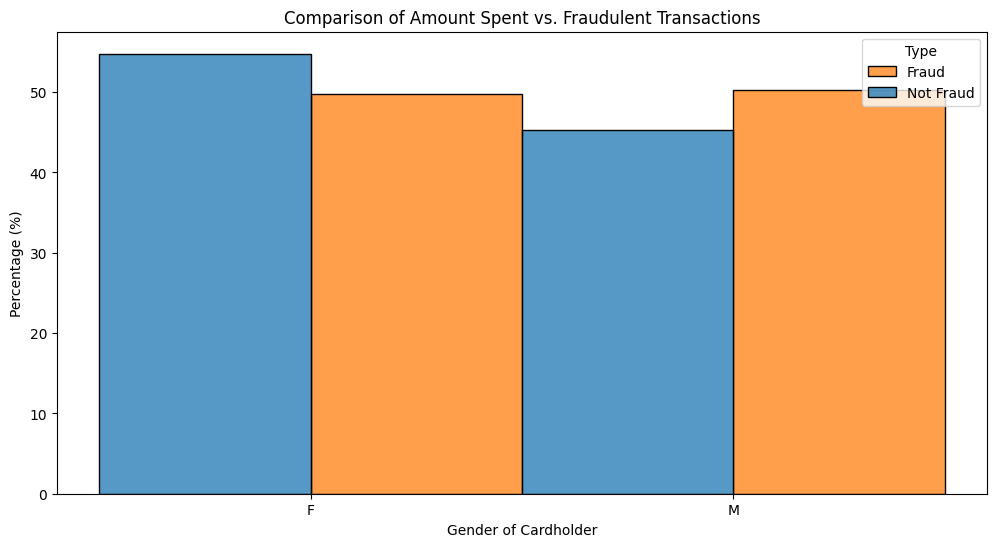

In [233]:
plt.figure(figsize=(12, 6))
sns.histplot(x='gender',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)

plt.title('Comparison of Amount Spent vs. Fraudulent Transactions')
plt.xlabel('Gender of Cardholder')
plt.ylabel('Percentage (%)')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.show()

we can see that gender does not really effect fraudulent transactions 

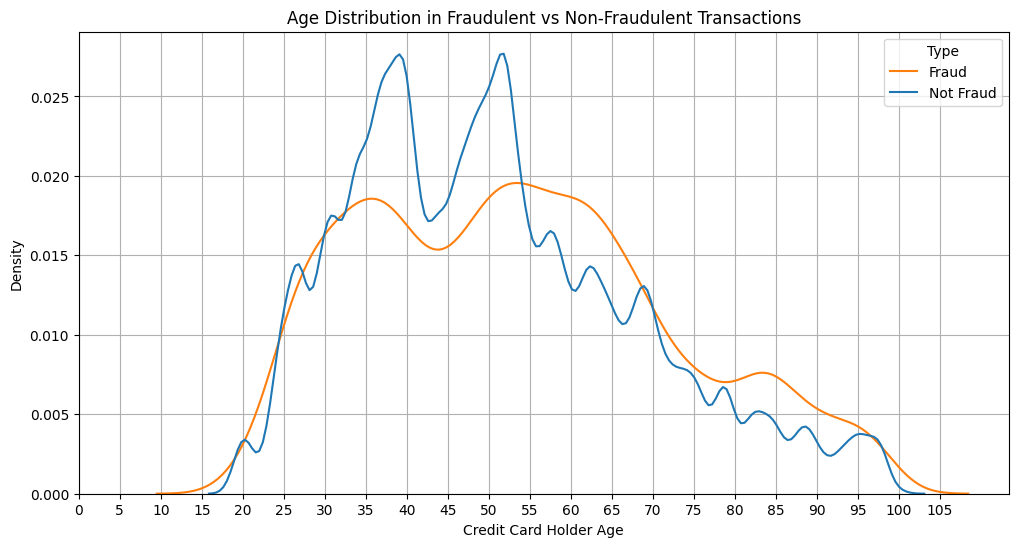

In [234]:
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

df = df[(df['age'] >= 0) & (df['age'] <= 110)]

# Create KDE plot
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(data=df, x='age', hue='is_fraud', common_norm=False)

# Customize the plot
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 5))  # Set x-ticks from 0 to 120
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.grid()


plt.show()

we can see fraud transactions spike around ages 30 and 50-55

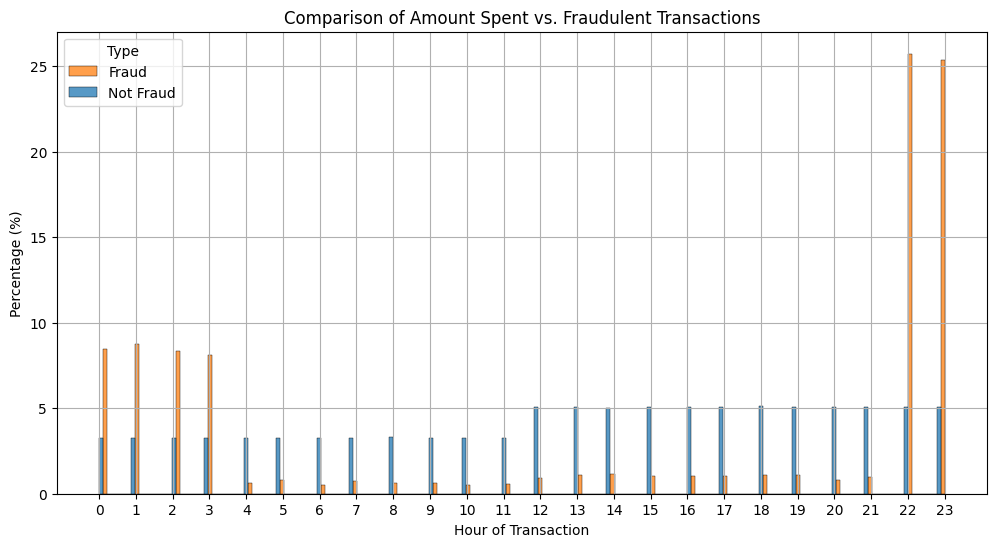

In [240]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_hour'] = df['trans_date_trans_time'].dt.hour


plt.figure(figsize=(12, 6))
sns.histplot(x='trans_hour',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)

plt.title('Comparison of Amount Spent vs. Fraudulent Transactions')
plt.xlabel('Hour of Transaction')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.grid()

plt.show()


we can see that fraud transaction are much more common in the late hours of the night and very early hours of the morning

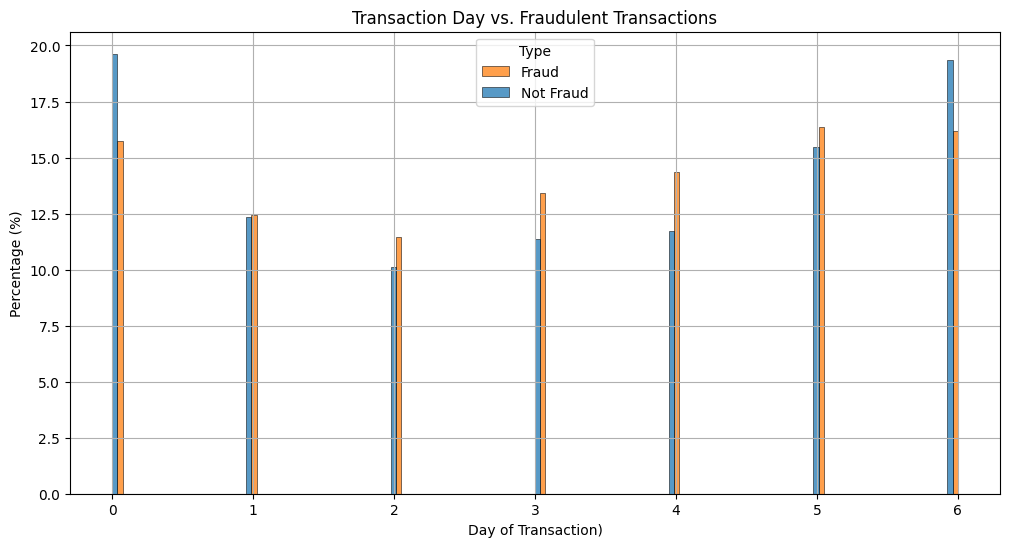

In [236]:
plt.figure(figsize=(12, 6))
sns.histplot(x='trans_day', data=df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False)

plt.title('Transaction Day vs. Fraudulent Transactions')
plt.xlabel('Day of Transaction)')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(0, 7, 1))  # 0 = monday 6 = sunday
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.grid()

plt.show()

We can see that fraud transactions are more common than non fraud tuesday-saturday

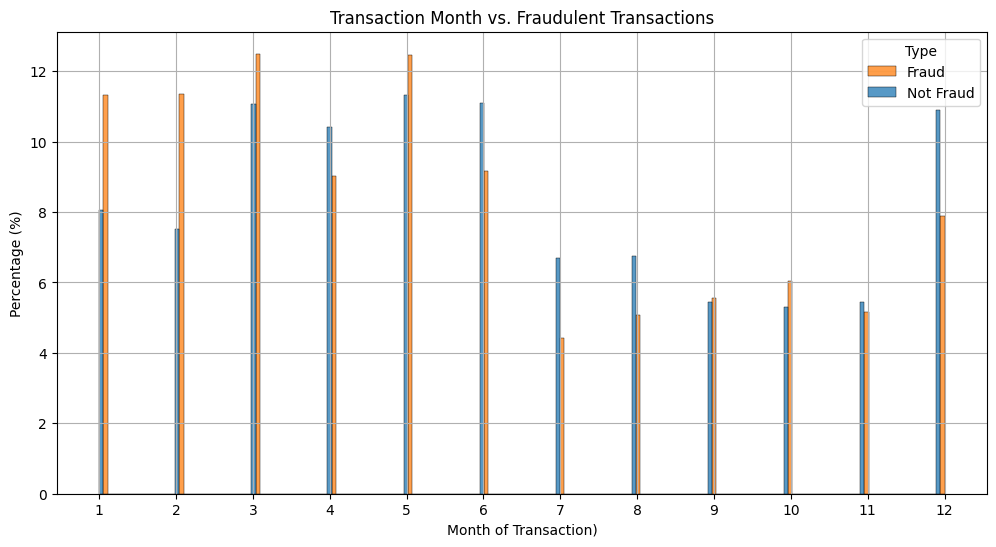

In [237]:
plt.figure(figsize=(12, 6))
sns.histplot(x='trans_month', data=df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False)

plt.title('Transaction Month vs. Fraudulent Transactions')
plt.xlabel('Month of Transaction)')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(1, 13, 1))  
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.grid()


plt.show()

we can see that fraud transactions are much higher january, february, march, and may

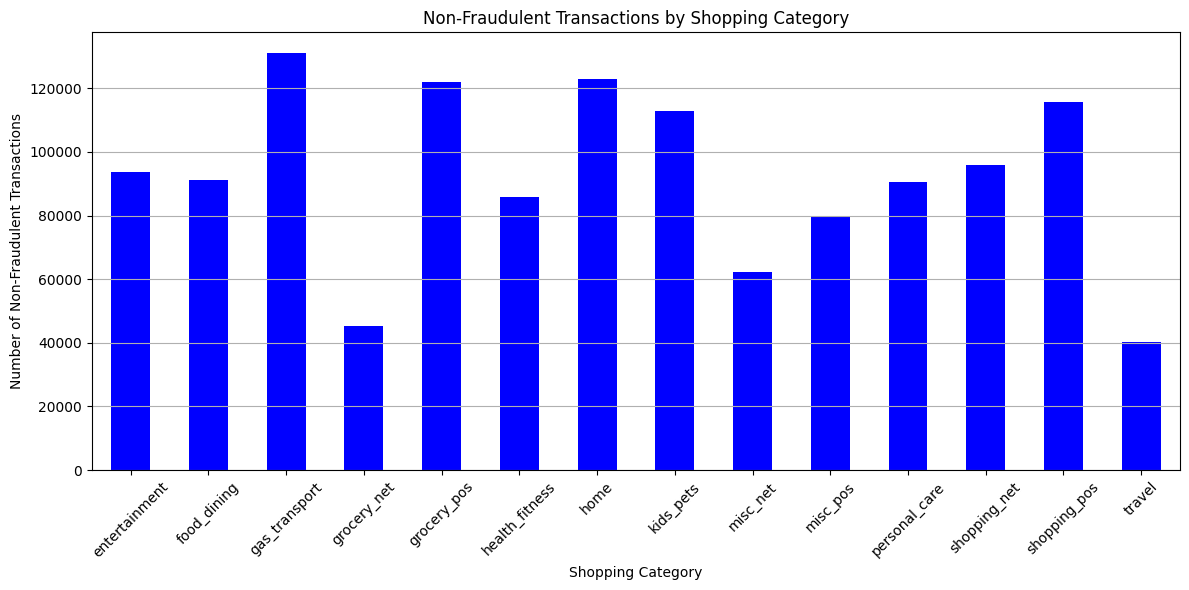

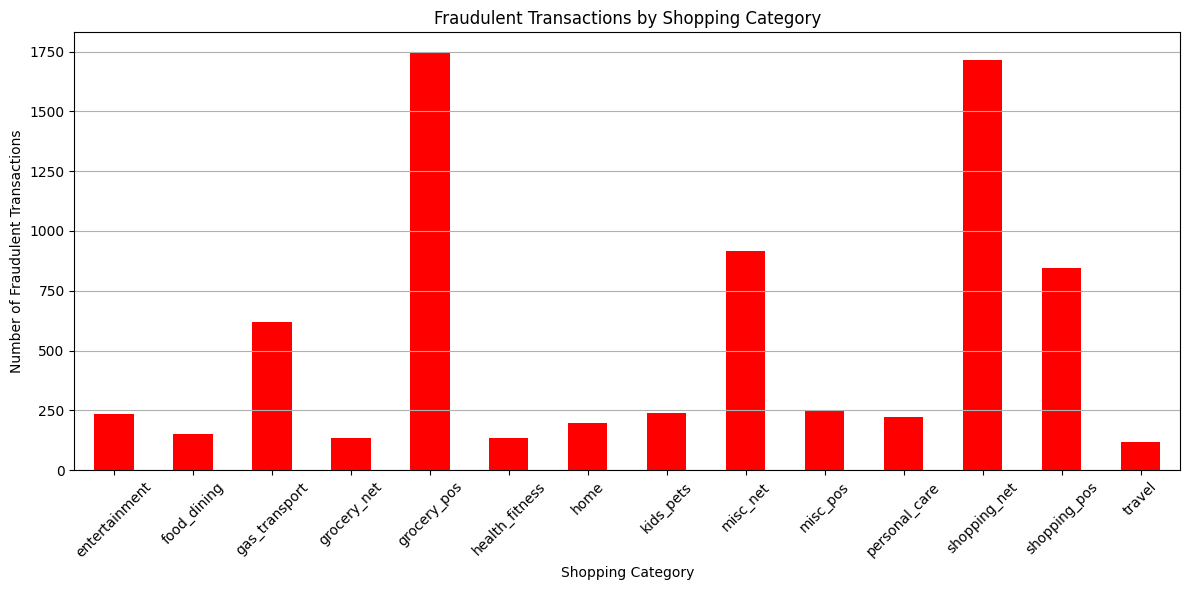

In [217]:
counts = df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)

# Plot for Non-Fraudulent Transactions
plt.figure(figsize=(12, 6))
counts[0].plot(kind='bar', color='blue')
plt.title('Non-Fraudulent Transactions by Shopping Category')
plt.xlabel('Shopping Category')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot for Fraudulent Transactions
plt.figure(figsize=(12, 6))
counts[1].plot(kind='bar', color='red')
plt.title('Fraudulent Transactions by Shopping Category')
plt.xlabel('Shopping Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

we can see that groceries, misc, and shopping have the highest number of fraud transactions

# Modelling

## Loading Train/Test Set

In [218]:
train_df = pd.read_csv('fraudTrain.csv', index_col=0)
test_df = pd.read_csv('fraudTest.csv', index_col=0)

## Function to Add Extra Cols to Dataframe

In [219]:
def extra_cols(df):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    df['trans_day'] = df['trans_date_trans_time'].dt.dayofweek
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

    return df

In [221]:
extra_cols(train_df)
extra_cols(test_df)

train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,0,36
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,0,46
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,0,62
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,0,57
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,0,38


## Defining Features 

In [222]:
features = ['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','trans_hour','trans_day','trans_month','is_fraud']

train_df = train_df[features]
test_df = test_df[features]

## Turning Catagorical Data to Dummy Data 

In [223]:
train_df=pd.get_dummies(train_df, drop_first=True)
test_df=pd.get_dummies(test_df, drop_first=True)

In [224]:
X_train=train_df.drop("is_fraud", axis='columns').values
y_train=train_df['is_fraud'].values

X_test=test_df.drop("is_fraud", axis='columns').values
y_test=test_df['is_fraud'].values


## Simulating Minority Data

In [225]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

## Logistic Regression Model

In [226]:
log_reg = LogisticRegression()
log_reg.fit(X_smote,y_smote)

pred = log_reg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


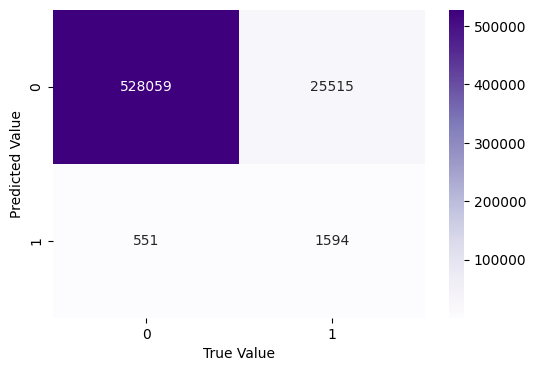

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.06      0.74      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



In [227]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Purples')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification report
print(classification_report(y_test, pred))

With an accuracy of 0.06, the performance of the logistic regression model for credit card fraud detection is very poor. This extremely low accuracy indicates that the model is almost always predicting the wrong class, likely classifying nearly all transactions as non-fraudulent. This issue stems from the highly imbalanced dataset, where fraudulent transactions represent a very small fraction of the total. Logistic regression, being a linear model, fails to capture the complex, non-linear patterns necessary to distinguish fraud. Furthermore, the model's focus on overall accuracy causes it to heavily favor the majority class (non-fraud), leading to almost no detection of the minority class (fraud). In such cases, the model's poor performance emphasizes the need for alternative approaches, such as resampling, adjusting class weights, or using non-linear models better suited for this type of data.

# Improving using RFC

A Random Forest Classifier (RFC) is likely to perform better than logistic regression in fraud detection due to its ability to handle non-linear relationships and complex interactions between features. Additionally, RFC is robust to imbalanced data and can effectively differentiate between the majority (non-fraud) and minority (fraud) classes by creating multiple decision trees that capture different aspects of the data. Its ensemble approach reduces overfitting and increases accuracy in detecting rare events like fraud, making it more suitable for this type of classification task.

In [228]:
rfc = RandomForestClassifier(random_state=10)

rfc.fit(X_smote,y_smote)
rfc_pred = rfc.predict(X_test)

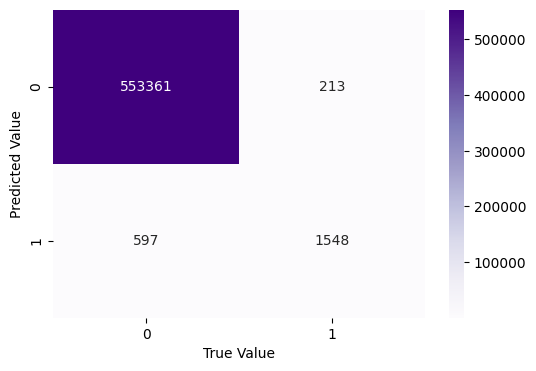

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.72      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719



In [230]:
conf_matrix = confusion_matrix(y_test, rfc_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Purples')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification report
print(classification_report(y_test, rfc_pred))

with a precision of 0.88 the rfc has performed much better as expected 